# Customer Analysis
Using clustering techniques to group similar customers together and analyze their features.

In [42]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
from collections import Counter

# Pre-processing
Process:
- remove unneeded variables
- transform variables to the proper types (not needed)
- one-hot encode categorical variables (not needed)
- normalize numeric variables

In [4]:
# read in marketing data
ifood = pd.read_csv('ifood_df.csv')

In [5]:
# remove variables
ifood_rdu = ifood.drop(['Z_CostContact', 'Z_Revenue', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall', 'Response', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'], axis=1)

# normalize the numeric variables
scaler = MinMaxScaler()
ifood_scal = scaler.fit_transform(ifood_rdu)

# DBSCAN
Process:
- estimate epsilon with a kNN distance plot
- tune parameters (estimated epsilon and minimum points) with a grid search
- run clustering algorithm with the final parameters
- evaluate the clusters (check for outliers; counter conversion; and silhouette scores)

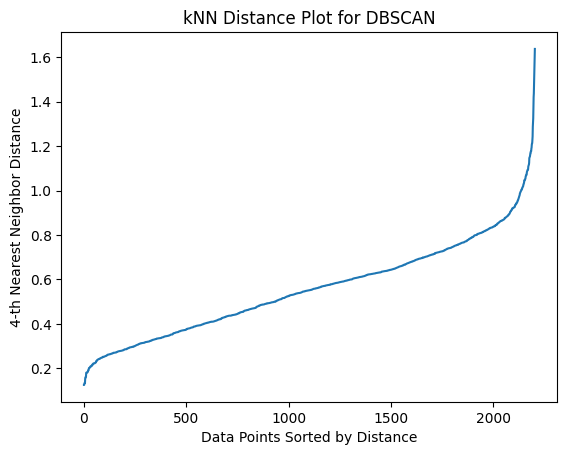

In [39]:
# estimate the central point radius (epsilon) with a kNN distance plot
k = 4

# fit the k-nearest neighbors model
neighbors = NearestNeighbors(n_neighbors = k)
neighbors_fit = neighbors.fit(ifood_scal)

# calculate the k-nearest distances
distances, indicies = neighbors_fit.kneighbors(ifood_scal)
k_distances = np.sort(distances[:, k-1])

# plot the kNN distance
plt.plot(k_distances)
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel(f'{k}-th Nearest Neighbor Distance')
plt.title('kNN Distance Plot for DBSCAN')
plt.show()

In [32]:
# loop through possible minimum sample values
for i in range(2, 21) :
    dbscan = DBSCAN(eps=0.9, min_samples=i).fit(ifood_scal)
    print(f'Minimum samples: {i}')
    print(set(dbscan.labels_))
    print(Counter(dbscan.labels_))

Minimum samples: 2
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, -1}
Counter({8: 420, 1: 278, 0: 243, 2: 184, 10: 137, 5: 114, 4: 111, 3: 99, 9: 94, 14: 76, 13: 75, -1: 57, 12: 51, 19: 46, 7: 37, 15: 33, 11: 32, 17: 22, 21: 21, 6: 19, 25: 18, 18: 14, 20: 5, 23: 4, 26: 4, 27: 3, 16: 2, 22: 2, 24: 2, 28: 2})
Minimum samples: 3
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, -1}
Counter({8: 420, 1: 278, 0: 243, 2: 184, 10: 137, 5: 114, 4: 111, 3: 99, 9: 94, 14: 76, 13: 75, -1: 65, 12: 51, 18: 46, 7: 37, 15: 33, 11: 32, 16: 22, 20: 21, 6: 19, 22: 18, 17: 14, 19: 5, 21: 4, 23: 4, 24: 3})
Minimum samples: 4
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, -1}
Counter({8: 420, 1: 278, 0: 243, 2: 184, 10: 137, 5: 114, 4: 111, 3: 99, 9: 94, 14: 76, 13: 75, -1: 68, 12: 51, 18: 46, 7: 37, 15: 33, 11: 32, 16: 22, 6: 19, 22: 18, 20: 17, 17: 14, 19: 5, 21:

In [51]:
# run final DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
clusters = dbscan.fit_predict(ifood_scal)
ifood_rdu['Cluster_db'] = clusters

In [52]:
# evaluate cluster values

# group by cluster and calculate the average value for each variable within each group
comp_db = ifood_rdu.groupby('Cluster_db').agg('mean')
print(comp_db)

                  Income   Kidhome  ...  Cluster  Cluster_km
Cluster_db                          ...                     
-1          57959.304878  0.304878  ...     -1.0    3.439024
 0          51399.082305  0.411523  ...      0.0    4.000000
 1          53143.884892  0.464029  ...      1.0    0.000000
 2          56486.038043  0.418478  ...      2.0    1.000000
 3          50271.670103  0.412371  ...      3.0    2.000000
 4          52863.809091  0.418182  ...      4.0    6.000000
 5          54867.333333  0.403509  ...      5.0    1.000000
 6          21303.421053  0.526316  ...      6.0    3.000000
 7          49541.472222  0.472222  ...      7.0    2.000000
 8          51027.171429  0.452381  ...      8.0    3.000000
 9          52510.191489  0.425532  ...      9.0    1.000000
 10         52927.742647  0.485294  ...     10.0    2.000000
 11         50648.193548  0.516129  ...     11.0    5.000000
 12         52880.078431  0.411765  ...     12.0    1.000000
 13         54710.160000

# K-Means Clustering

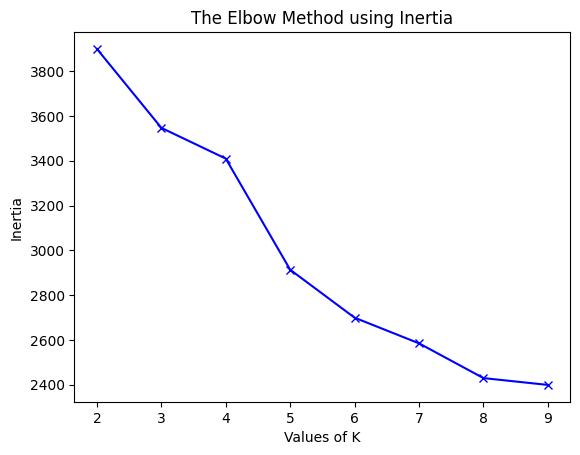

In [6]:
# for loop to test different values of k
inertias = []
silhouette_coefficients = []

K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k).fit(ifood_scal)
    km.fit(ifood_scal)
    inertias.append(km.inertia_)
    score = silhouette_score(ifood_scal, km.labels_)
    silhouette_coefficients.append(score)

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

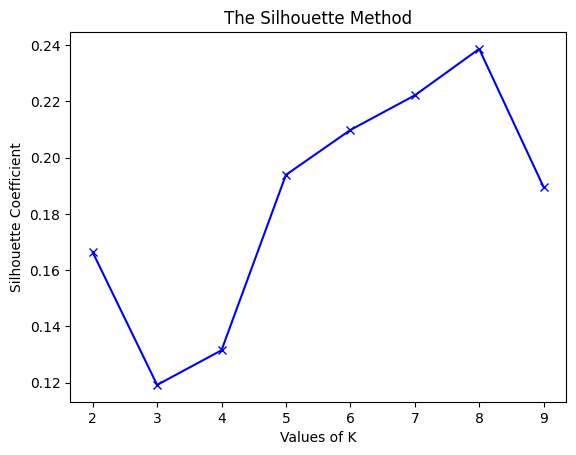

In [7]:
plt.plot(K, silhouette_coefficients, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette Coefficient')
plt.title('The Silhouette Method')
plt.show()
  

In [21]:
# k-means models (k=7 and k=8)
km_7 = KMeans(n_clusters=7, random_state=1234, n_init=25).fit(ifood_scal)
print(set(km_7.labels_))
print(Counter(km_7.labels_))

km_8 = KMeans(n_clusters=8, random_state=1234, n_init=25).fit(ifood_scal)
print(set(km_8.labels_))
print(Counter(km_8.labels_))

{0, 1, 2, 3, 4, 5, 6}
Counter({1: 476, 3: 449, 2: 364, 0: 297, 4: 266, 5: 199, 6: 154})
{0, 1, 2, 3, 4, 5, 6, 7}
Counter({3: 449, 4: 364, 6: 297, 7: 289, 2: 266, 0: 198, 5: 187, 1: 155})


In [31]:
# final k-means model (k=7)
km_final = KMeans(n_clusters=7, random_state=1234, n_init=25).fit_predict(ifood_scal)
#clusters = dbscan.fit_predict(ifood_scal)
ifood['Cluster_km'] = km_final

In [32]:
# evaluate cluster values

# save data with only continuous variables + cluster variable
ifood_num = ifood[['Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
        'Cluster_km']]

# group by cluster and then aggregate the other variables within each cluster
cluster_means = ifood_num.groupby('Cluster_km').agg('mean')
print(cluster_means)


                  Income    Recency    MntWines  MntFruits  MntMeatProducts  \
Cluster_km                                                                    
0           51733.050505  49.912458  300.700337  29.178451       176.811448   
1           55220.581933  48.500000  409.573529  20.012605       163.571429   
2           52629.579670  47.346154  333.788462  21.431319       163.343407   
3           49515.636971  48.663697  260.930958  28.608018       164.358575   
4           49123.958647  50.360902  247.372180  31.913534       178.729323   
5           47497.180905  48.527638  201.753769  29.492462       135.814070   
6           53690.948052  52.064935  300.136364  32.616883       170.889610   

            MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster_km                                                    
0                 44.107744         29.821549     50.427609   
1                 26.897059         20.411765     32.256303   
2                 31.574176         

In [33]:
# save all categorical variables into a list
ifood_count = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmpOverall',
             'education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD',
             'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow',
             'Kidhome', 'Teenhome', 'Complain', 'Response', 'Cluster_km']

# loop through all categorical variables to show distributions across clusters
for var in ifood_count :
    cluster_counts = pd.crosstab(ifood['Cluster_km'], ifood[var], normalize='index')
    print(f'Cluster counts for {var}:')
    print(cluster_counts)

Cluster counts for AcceptedCmp1:
AcceptedCmp1         0         1
Cluster_km                      
0             0.919192  0.080808
1             0.936975  0.063025
2             0.950549  0.049451
3             0.928731  0.071269
4             0.951128  0.048872
5             0.929648  0.070352
6             0.928571  0.071429
Cluster counts for AcceptedCmp2:
AcceptedCmp2         0         1
Cluster_km                      
0             0.976431  0.023569
1             0.978992  0.021008
2             0.994505  0.005495
3             0.991091  0.008909
4             0.988722  0.011278
5             0.989950  0.010050
6             0.987013  0.012987
Cluster counts for AcceptedCmp3:
AcceptedCmp3         0         1
Cluster_km                      
0             0.946128  0.053872
1             0.915966  0.084034
2             0.934066  0.065934
3             0.933185  0.066815
4             0.913534  0.086466
5             0.924623  0.075377
6             0.902597  0.097403
Cluster co